## 목차
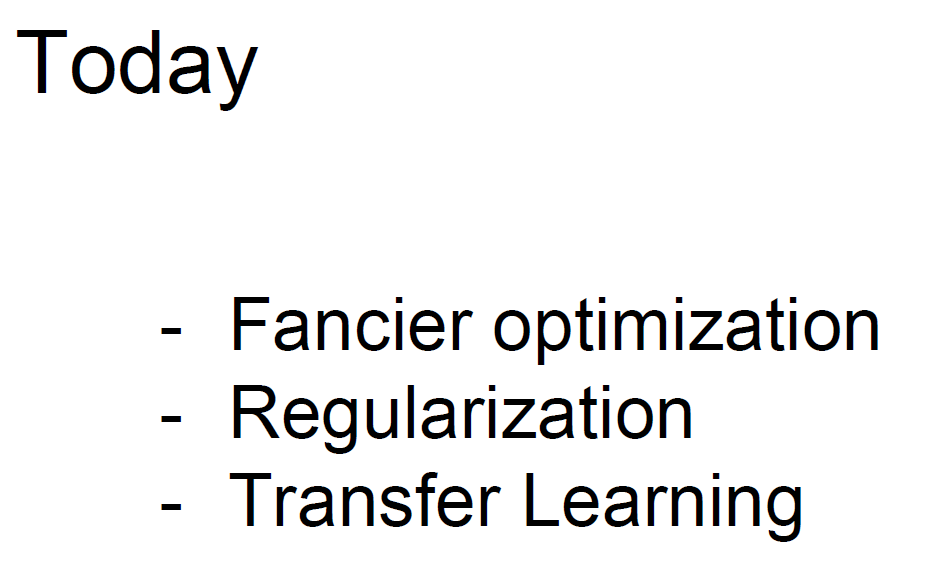

##### 이번 강에서는 NN에서 쓰이는 더욱 실용적인 optimization 알고리즘들과 regularization 을 소개한다. 그리고 Transfer Learning에 대해서 배울 것이다.

## Optimization(SGD)
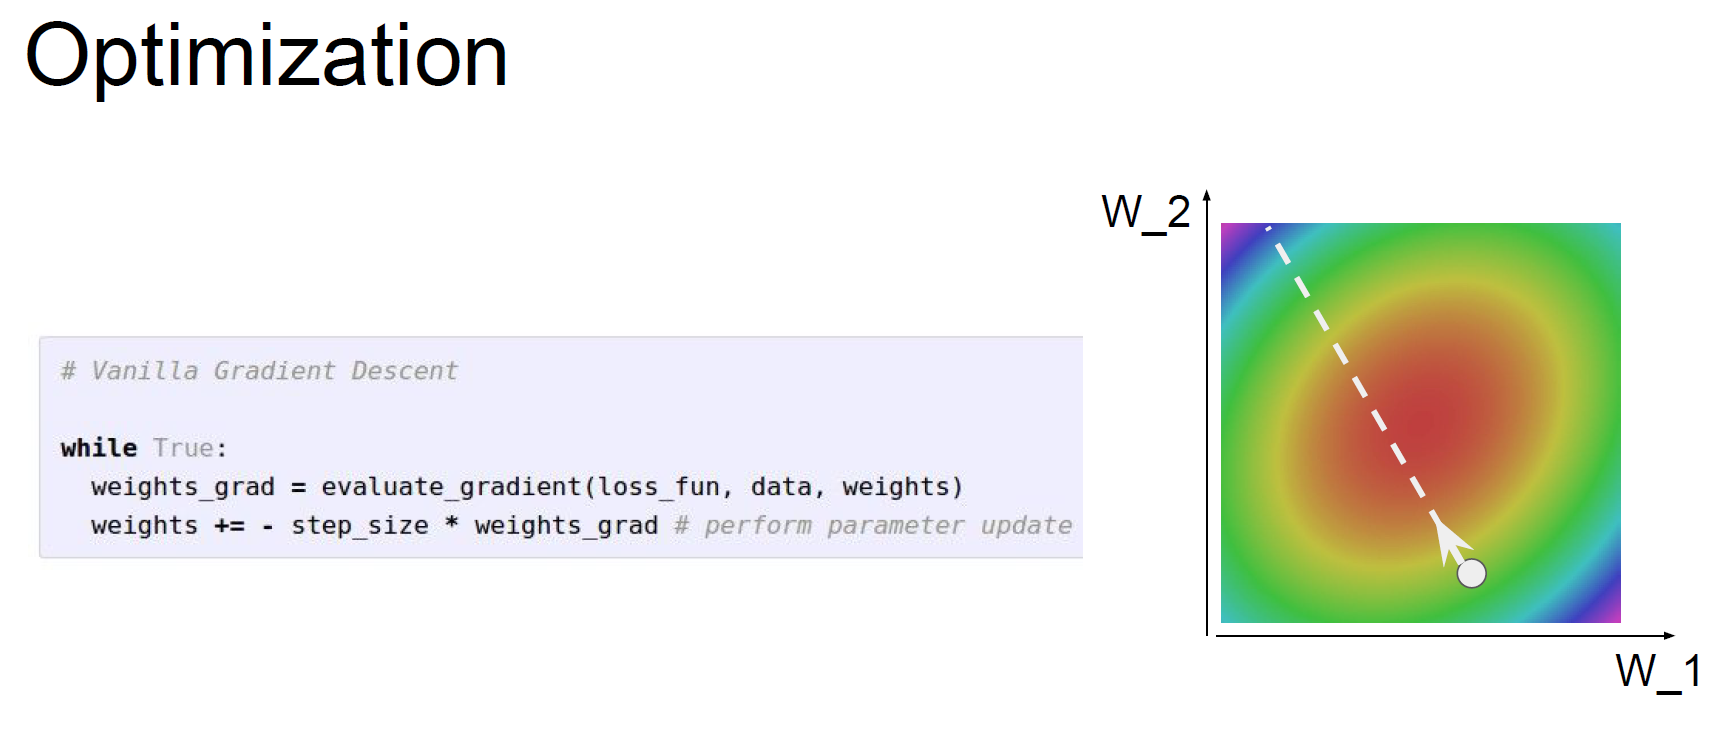


##### 궁극적인 목표는 최소의 loss 값을 갖는 w를 찾아서 빨간 지점에 도달하는 것이다.
##### 이전에 SGD 방식을 배웠는데, 그저 기울기가 음수이면 step, 이를 계속 반복해서 optimization을 해가는 방식이다.
##### 하지만 이 방식은 간단한 만큼 문제를 가지고 있다.

## SGD의 문제점
##### 1. taco shell problem : loss가 수직 방향으로만 sensitive해서 동일하게 이동하지 못하고, 지그재그로 이동하게 되는 문제. 고차원일수록 문제가 심각해짐.
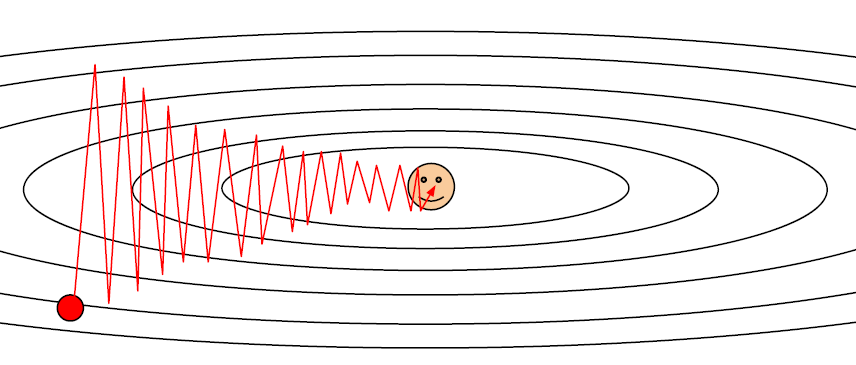

##### 2. local minima : 극대값들 사이에 극소값에 안착하게 되는 경우이다. SGD의 경우 기울기가 0인 지점을 loss의 최소값으로 찾아 최적점으로 인식하는 원리라 local minima에서는 더 이상 update가 이뤄지지 않는다.
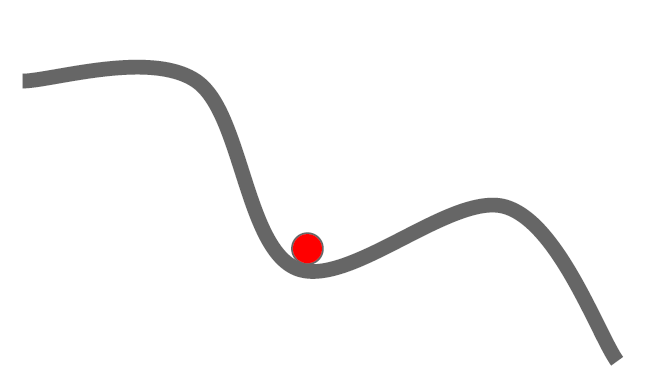

##### 3. saddle point : 아래 그림처럼 해당 위치에 안착하는 경우이다. 데이터가 고차원일수록 잘 일어나고, 기울기 0인 주변 지점의 기울기가 매우 작아져서 update도 굉장히 느려지는 문제가 발생한다.
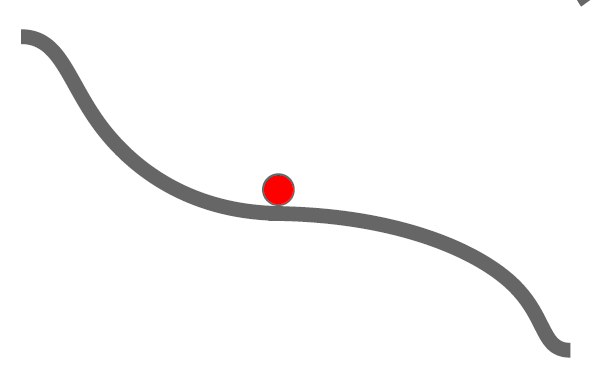

##### 4. 'S'tochastic의 문제 발생 : 미니배치마다 loss를 계산하여 전진해나가는데, 매우 비효율적이다. 또, 미니배치마다 update를 위해 추정값을 이용하는데 이것이 엄청난 noise를 일으킨다.
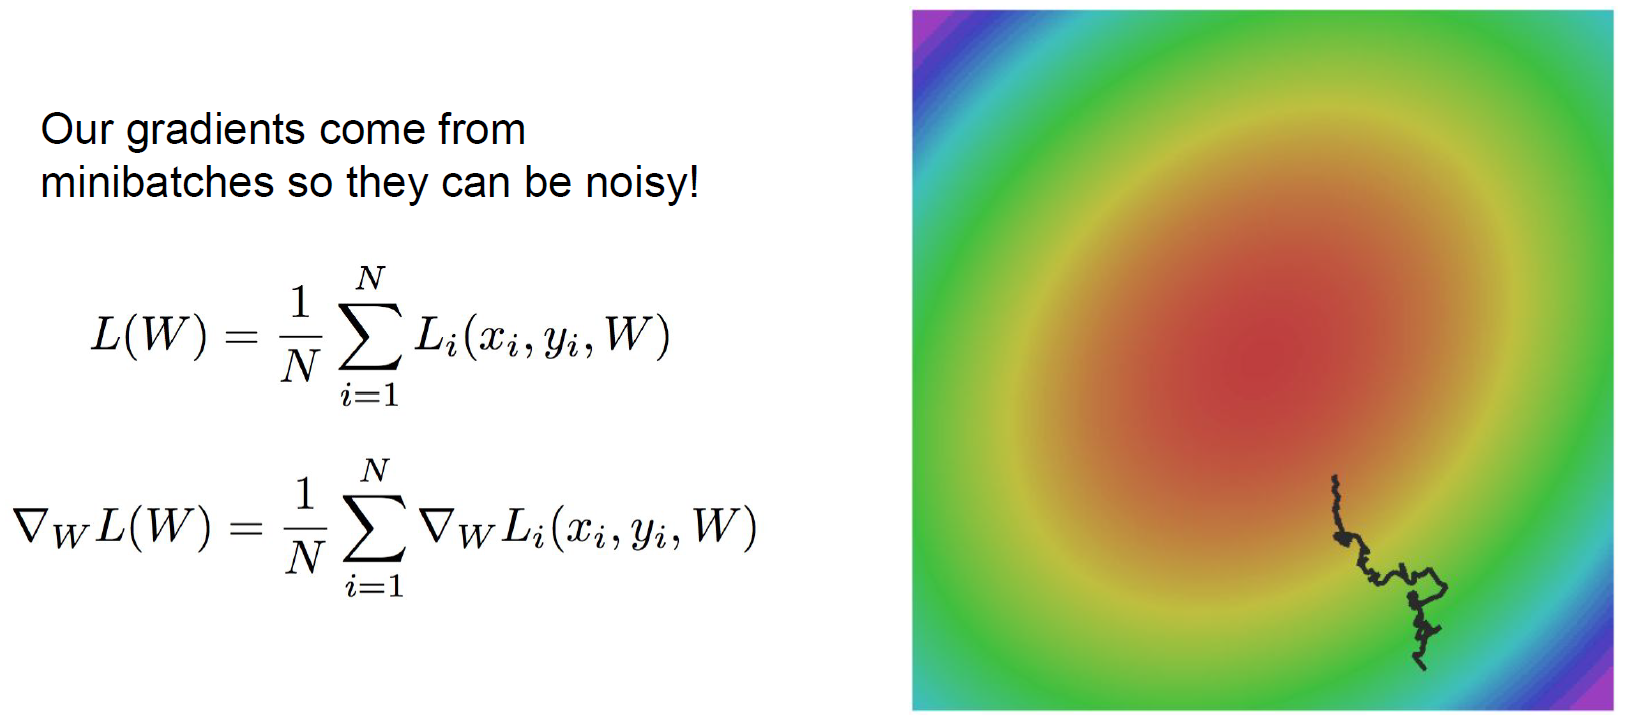

##### Q : full batch를 이용한 gradient descent를 이용하면, 해결할 수 있는가?
##### A : taco shell, saddle point 문제는 full batch에서도 여전히 존재하는 문제이므로 좀 더 공상적이고, 수학적인 접근이 필요하다.

## SGD + Momentum
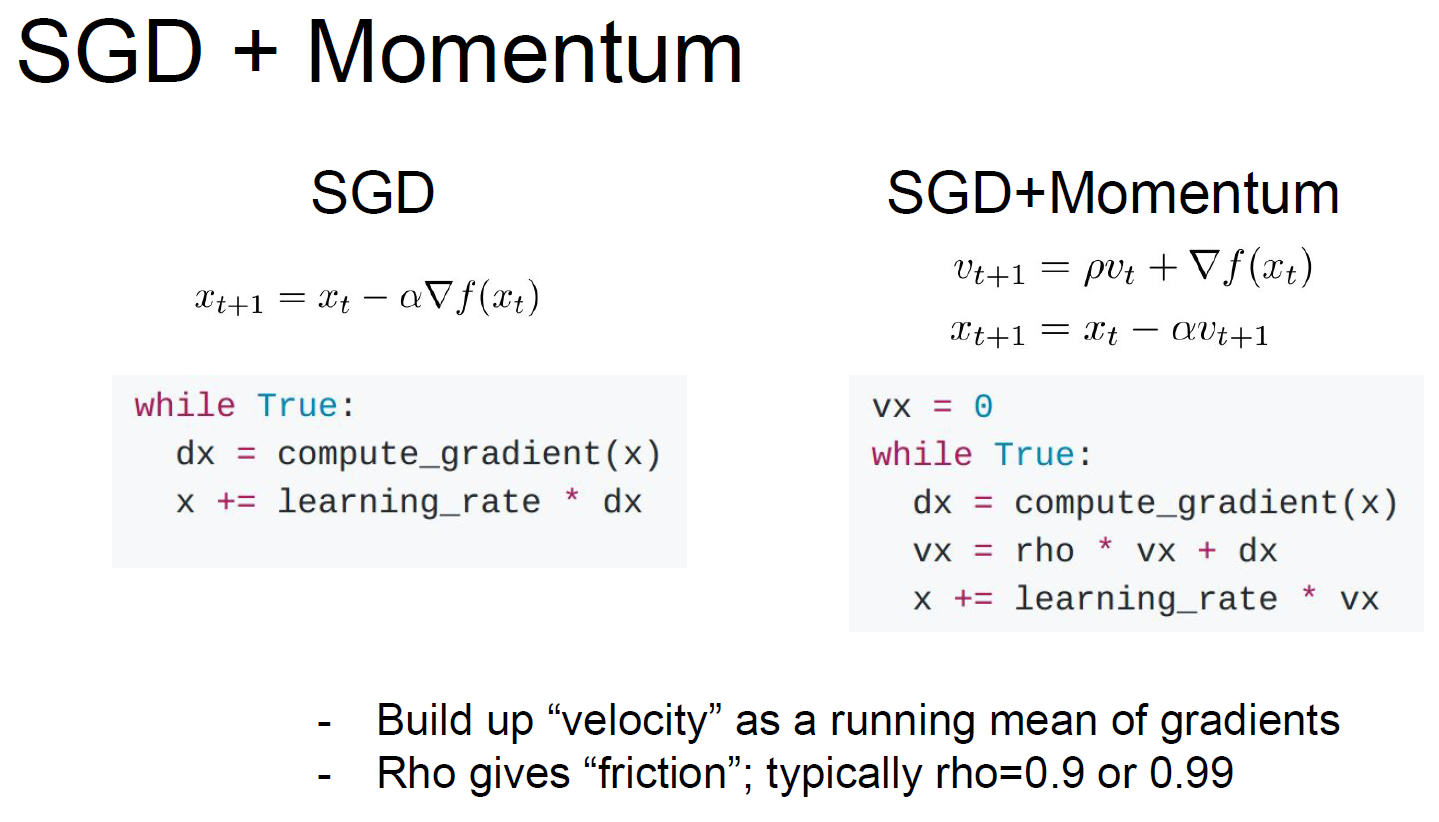